In [1]:
# Cell 1: Import ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_curve, auc)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

print("✅ ML libraries imported!")

✅ ML libraries imported!


In [2]:
# Cell 2: Load and prepare data
df = pd.read_csv('../data/power_line_data.csv')

# Select features (X) and target (y)
# We'll use current, voltage, power, impedance as features
feature_cols = ['current_phase_A', 'voltage_phase_A', 'power', 'impedance']
X = df[feature_cols]
y = df['is_fault']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures used: {feature_cols}")
print(f"Target: is_fault (1=Fault, 0=Normal)")

# Check class balance
print(f"\nClass distribution:")
print(f"Normal (0): {(y == 0).sum()} samples")
print(f"Fault (1): {(y == 1).sum()} samples")
print(f"Fault percentage: {y.mean()*100:.2f}%")

Features shape: (86400, 4)
Target shape: (86400,)

Features used: ['current_phase_A', 'voltage_phase_A', 'power', 'impedance']
Target: is_fault (1=Fault, 0=Normal)

Class distribution:
Normal (0): 86055 samples
Fault (1): 345 samples
Fault percentage: 0.40%


In [3]:
# Cell 3: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("📊 Data Split Summary:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining class distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTesting class distribution:")
print(pd.Series(y_test).value_counts())

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Data scaled using StandardScaler")

📊 Data Split Summary:
Training set: 69120 samples (80.0%)
Testing set: 17280 samples (20.0%)

Training class distribution:
is_fault
0    68844
1      276
Name: count, dtype: int64

Testing class distribution:
is_fault
0    17211
1       69
Name: count, dtype: int64

✅ Data scaled using StandardScaler


In [4]:
# Cell 4: Train Random Forest model
print("🌲 Training Random Forest Classifier...")

# Create and train model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'  # Helps with imbalanced data
)

rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)
y_test_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

print("✅ Model trained successfully!")

🌲 Training Random Forest Classifier...
✅ Model trained successfully!


📊 RANDOM FOREST MODEL EVALUATION

📈 Accuracy Scores:
Training Accuracy: 1.0000 (100.00%)
Testing Accuracy: 1.0000 (100.00%)

📋 Classification Report (Test Set):
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     17211
       Fault       1.00      1.00      1.00        69

    accuracy                           1.00     17280
   macro avg       1.00      1.00      1.00     17280
weighted avg       1.00      1.00      1.00     17280



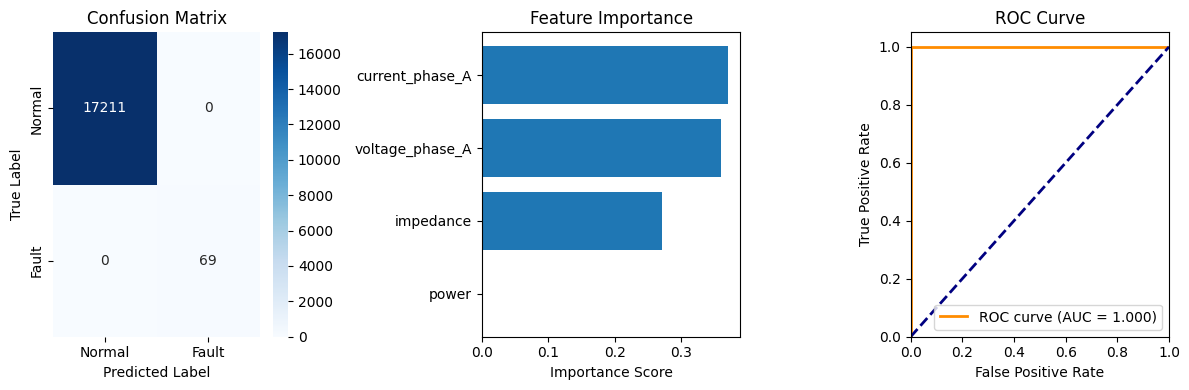

In [5]:
# Cell 5: Evaluate model
print("="*60)
print("📊 RANDOM FOREST MODEL EVALUATION")
print("="*60)

# Calculate metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\n📈 Accuracy Scores:")
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Testing Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

print(f"\n📋 Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred,
                            target_names=['Normal', 'Fault']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fault'],
            yticklabels=['Normal', 'Fault'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Feature Importance
plt.subplot(1, 3, 2)
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Importance Score')

# ROC Curve
plt.subplot(1, 3, 3)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

🤖 Comparing Different ML Models...
Logistic Regression  | Accuracy: 1.0000
Decision Tree        | Accuracy: 1.0000
Random Forest        | Accuracy: 1.0000
SVM                  | Accuracy: 1.0000


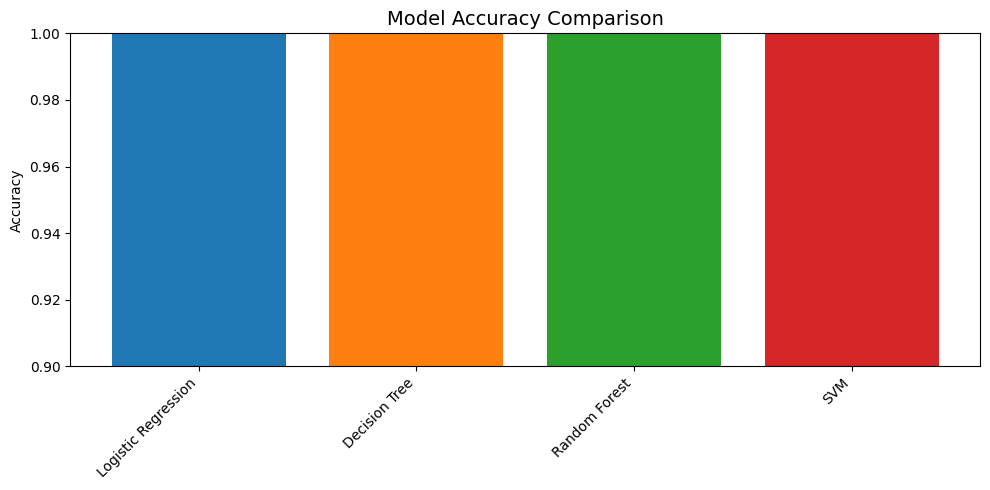


🏆 Best Model: Logistic Regression
   Accuracy: 1.0000


In [6]:
# Cell 6: Compare multiple models (Simplified)
print("🤖 Comparing Different ML Models...")

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

results = []

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy
    })

    print(f"{name:20} | Accuracy: {accuracy:.4f}")

# Create results DataFrame
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)

# Plot comparison
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['Accuracy'],
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.9, 1.0)
plt.tight_layout()
plt.show()

print("\n🏆 Best Model:", results_df.iloc[0]['Model'])
print(f"   Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")

In [7]:
# Cell 7: Save the trained model
import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the Random Forest model (our best performer)
model_path = '../models/fault_detection_model.pkl'
scaler_path = '../models/scaler.pkl'

joblib.dump(rf_model, model_path)
joblib.dump(scaler, scaler_path)

print(f"✅ Model saved to: {model_path}")
print(f"✅ Scaler saved to: {scaler_path}")

# Verify model can be loaded
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)

# Quick test
test_sample = X_test_scaled[0:1]
prediction = loaded_model.predict(test_sample)
probability = loaded_model.predict_proba(test_sample)

print(f"\n🧪 Quick Test:")
print(f"Test sample prediction: {'FAULT' if prediction[0] == 1 else 'NORMAL'}")
print(f"Fault probability: {probability[0][1]:.4f}")
print("✅ Model loading verified!")

✅ Model saved to: ../models/fault_detection_model.pkl
✅ Scaler saved to: ../models/scaler.pkl

🧪 Quick Test:
Test sample prediction: NORMAL
Fault probability: 0.0000
✅ Model loading verified!
